# Download RGI glacier shapefiles and plot those that are in our RoI

In [1]:
import geopandas as gpd
import os

In [2]:
data_dir = "rgi_data"

In [3]:
!mkdir -p $data_dir
%cd $data_dir
if not os.path.exists('01_rgi60_Alaska.zip'):
    !wget -O 01_rgi60_Alaska.zip https://www.glims.org/RGI/rgi60_files/01_rgi60_Alaska.zip
    !unzip 01_rgi60_Alaska.zip
%cd ..

/home/jovyan/glacier-velocity-from-sar/import_data/import_glacier_shapefiles_rgi/rgi_data
/home/jovyan/glacier-velocity-from-sar/import_data/import_glacier_shapefiles_rgi


In [4]:
# rgi60_gdf = gpd.read_file("shapefiles/02_rgi60_WesternCanadaUS.shp")
rgi60_gdf = gpd.read_file(f"{data_dir}/01_rgi60_Alaska.shp")
muldrow_box = gpd.read_file('muldrow_roi.geojson')

<AxesSubplot:>

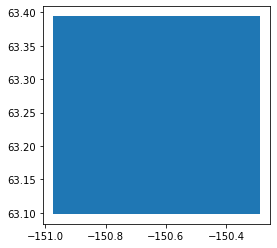

In [5]:
muldrow_box.plot()

In [6]:
muldrow_box.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
rgi60_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

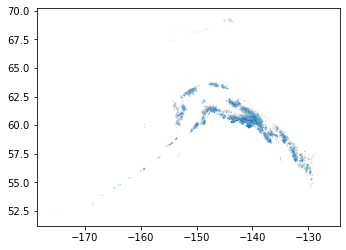

In [8]:
rgi60_gdf.plot()

In [9]:
# wa_rgi60_gdf = rgi60_gdf[rgi60_gdf.within(rainier_box)].copy()
ak_rgi60_gdf = rgi60_gdf[rgi60_gdf.intersects(muldrow_box.loc[0, 'geometry'])]

<AxesSubplot:>

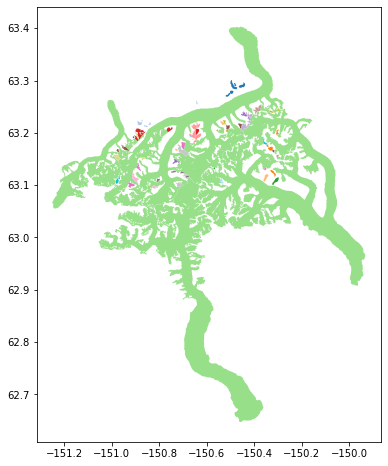

In [10]:
ak_rgi60_gdf.plot(figsize=(8,8),cmap='tab20')

<AxesSubplot:>

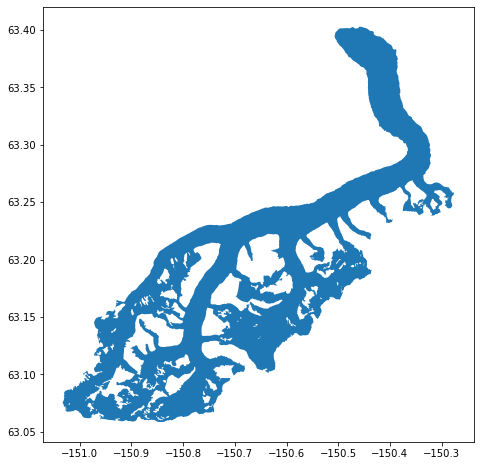

In [11]:
ak_rgi60_gdf[ak_rgi60_gdf['Name']=='Muldrow Glacier'].plot(figsize=(8,8),cmap='tab20')

In [12]:
muldrow_gdf = ak_rgi60_gdf[ak_rgi60_gdf['Name']=='Muldrow Glacier']

In [13]:
muldrow_gdf

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
22164,RGI60-01.22169,G209587E63351N,20100912,-9999999,-150.413116,63.350685,1,2,331.578,795,...,7,62117,0,0,0,0,3,9,Muldrow Glacier,"POLYGON ((-150.44430 63.40121, -150.44236 63.4..."


In [14]:
muldrow_proj = muldrow_gdf.to_crs('EPSG:32605')
muldrow_proj.to_file("rgi_data/muldrow_glacier.geojson", driver='GeoJSON')